In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('/Users/rutendosigauke/Desktop/Dowell_Lab/projects/wavelets/nascentwt/'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from nascentwt.region_extraction import *
from nascentwt.wavelet_transforms import *


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
import pywt

%matplotlib inline

# Wavelets and functions

In [4]:
discrete_wavelets = ['db5', 'sym5', 'coif5', 'bior2.4']
continuous_wavelets = ['mexh', 'morl', 'cgau5', 'gaus5']

In [5]:
def sample_wavelets(discrete, continuous):
    list_list_wavelets = [discrete, continuous]
    list_funcs = [pywt.Wavelet, pywt.ContinuousWavelet]

    fig, axarr = plt.subplots(nrows=2, ncols=4, figsize=(16,8))
    for ii, list_wavelets in enumerate(list_list_wavelets):
        func = list_funcs[ii]
        row_no = ii
        for col_no, waveletname in enumerate(list_wavelets):
            wavelet = func(waveletname)
            family_name = wavelet.family_name
            biorthogonal = wavelet.biorthogonal
            orthogonal = wavelet.orthogonal
            symmetry = wavelet.symmetry
            if ii == 0:
                _ = wavelet.wavefun()
                wavelet_function = _[0]
                x_values = _[-1]
            else:
                wavelet_function, x_values = wavelet.wavefun()
            if col_no == 0 and ii == 0:
                axarr[row_no, col_no].set_ylabel("Discrete Wavelets", fontsize=16)
            if col_no == 0 and ii == 1:
                axarr[row_no, col_no].set_ylabel("Continuous Wavelets", fontsize=16)
            axarr[row_no, col_no].set_title("{}".format(family_name), fontsize=16)
            axarr[row_no, col_no].plot(x_values, wavelet_function)
            axarr[row_no, col_no].set_yticks([])
            axarr[row_no, col_no].set_yticklabels([])

    plt.tight_layout()
    plt.show()

/Users/rutendosigauke/miniconda3/envs/wavelets/lib/python3.6/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


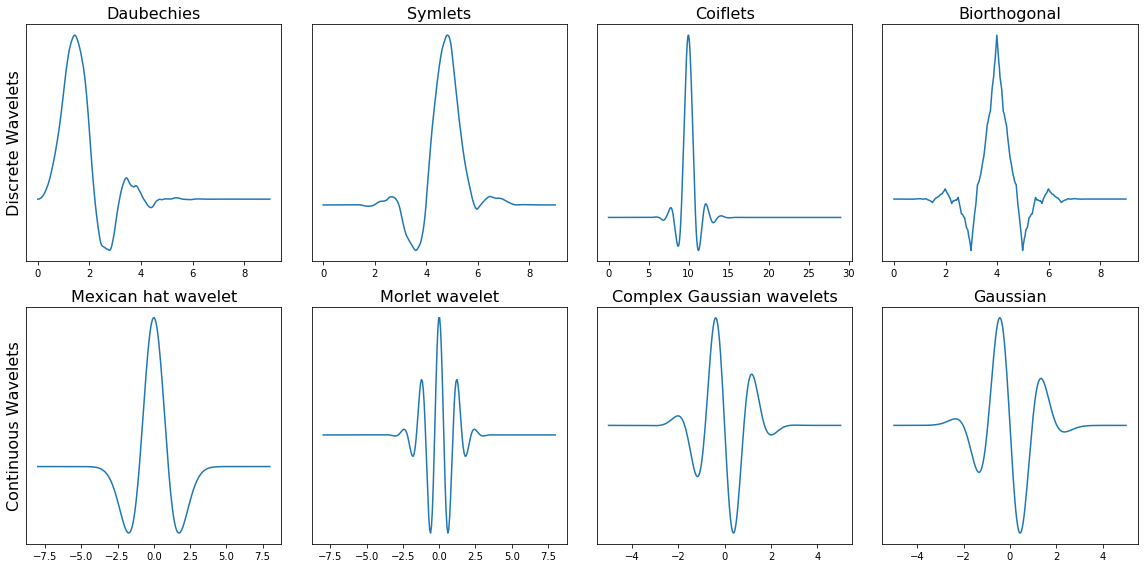

In [6]:
sample_wavelets(discrete_wavelets, continuous_wavelets)

In [7]:
w = pywt.Wavelet('sym5')

In [8]:
print(w)

Wavelet sym5
  Family name:    Symlets
  Short name:     sym
  Filters length: 10
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       near symmetric
  DWT:            True
  CWT:            False


The wavefun() method can be used to calculate approximations of scaling function **(phi)** and wavelet function **(psi)** at the given level of refinement.

For orthogonal wavelets returns approximations of scaling function and wavelet function with corresponding
x-grid coordinates:

In [9]:
[phi, psi, x] = w.wavefun(level=7)
#axarr[row_no, col_no].plot(x_values, wavelet_function, 'bD--')

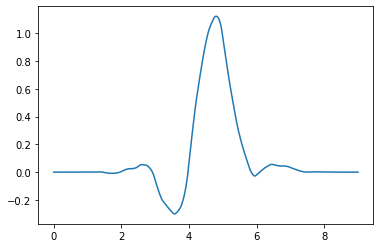

In [10]:
plt.plot(x, phi) 

In [11]:
#plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams["font.family"] = "Times New Roman"

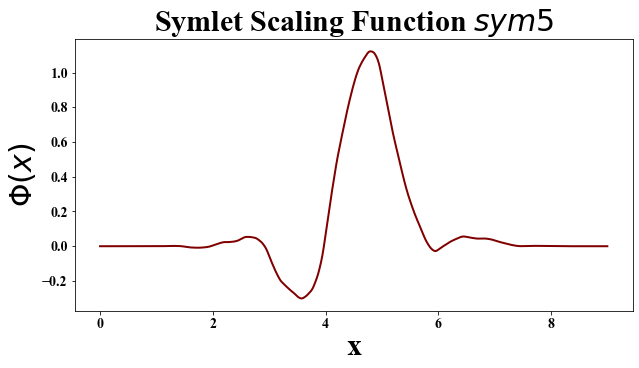

In [55]:
plt.figure(figsize=(10, 5))

# Remove the plot frame lines 
ax = plt.subplot(111)  
#ax.spines["top"].set_visible(False)  
#ax.spines["right"].set_visible(False) 

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
#ax.get_xaxis().tick_bottom()  
#ax.get_yaxis().tick_left()  

# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("x", fontsize=30, fontweight='bold')  
plt.ylabel(r"$\Phi (x)$", fontsize=30, fontweight='bold')  
plt.plot(x, phi, color = 'maroon',linewidth=2) 
plt.title("Symlet Scaling Function $sym5$",
          fontweight='bold', fontsize=30)  

plt.savefig('symlet_scaling_fxn_trans.pdf', transparent=True)  

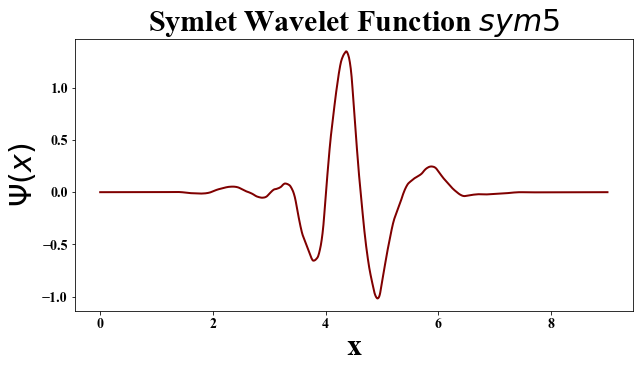

In [56]:
plt.figure(figsize=(10, 5))

# Remove the plot frame lines 
ax = plt.subplot(111)  
#ax.spines["top"].set_visible(False)  
#ax.spines["right"].set_visible(False) 

# Ensure that the axis ticks only show up on the bottom and left of the plot.  
# Ticks on the right and top of the plot are generally unnecessary chartjunk.  
#ax.get_xaxis().tick_bottom()  
#ax.get_yaxis().tick_left()  

# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("x", fontsize=30, fontweight='bold')  
plt.ylabel(r"$\Psi (x)$", fontsize=30, fontweight='bold')  
plt.plot(x, psi, color = 'maroon',linewidth=2) 
plt.title("Symlet Wavelet Function $sym5$",
          fontweight='bold', fontsize=30)  

plt.savefig('symlet_wavelet_fxn_trans.pdf', transparent=True)

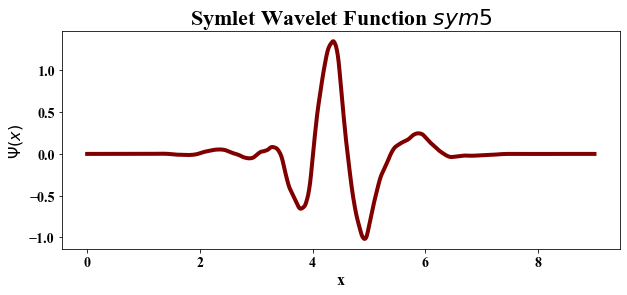

In [37]:
plt.figure(figsize=(10, 4))

# Remove the plot frame lines 
ax = plt.subplot(111)  

# Make sure your axis ticks are large enough to be easily read.  
# You don't want your viewers squinting to read your plot.  
plt.xticks(fontsize=14)  
plt.yticks(fontsize=14)  

# Along the same vein, make sure your axis labels are large  
# enough to be easily read as well. Make them slightly larger  
# than your axis tick labels so they stand out.  
plt.xlabel("x", fontsize=16, fontweight='bold')  
plt.ylabel(r"$\Psi (x)$", fontsize=16, fontweight='bold')  
plt.plot(x, psi, color = 'maroon',linewidth=4) 
plt.title("Symlet Wavelet Function $sym5$",
          fontweight='bold', fontsize=22)  

plt.savefig('symlet_wavelet_fxn.png', transparent=True)


$$X_{w(a,b)} =  \frac{1}{|a|^{1/2}} \int_{\infty}^{\infty} x (t) \psi \frac{t-b}{a} dt$$

$\psi(t)$ : mother wavelet

$a$ : scaling factor

$b$ : translation factor

DWT uses discrete values for the scale ($a$) and translation factor ($b$)

- the scale factor increases in powers of two ($a = 1,2,4 ...$)
- the translation factor increases integer values ($b = 1,2,3 ..$)

The DWT is only discrete in the scale and translation domain, and not in the time domain.


# Coverage plot

## GAPDH

In [15]:
sample_bedGraph = '/Users/rutendosigauke/Desktop/Dowell_Lab/projects/wavelets/data/B2BGROseq/B2B10GROseq-TD.bedGraph'

sample_coverage = bedgraph_awk_strand(sample_bedGraph, 
                                      "chr12", 6534512, 6538374, "./", 
                                      "temp_cov", positive=True)

In [16]:
expand_starting_list, expand_coverage_list = expand_bedgraph(sample_coverage,
                                                            6534512, 6538374)
    

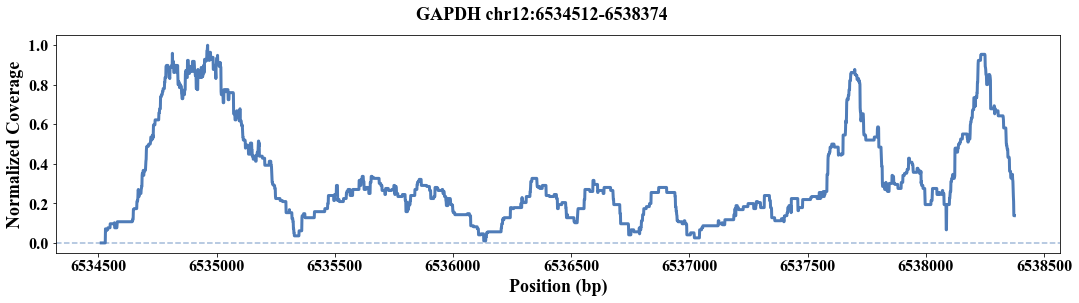

In [36]:
plt.figure(figsize=(18,4)) # #d73027
gs = plt.GridSpec(1, 1)
ax = plt.subplot(gs[0])
ax.plot(expand_starting_list, expand_coverage_list, color='#4575b4', alpha=0.95,linewidth=3)
ax.axhline(y=0, color='#4575b4', linestyle='--', alpha=0.5)
ax.set_xlabel('Position (bp)',fontsize=18,fontweight='bold')
ax.set_ylabel('Normalized Coverage',fontsize=18,fontweight='bold') 
plt.xticks(fontsize = 16)#,rotation=45)
plt.yticks(fontsize = 16)

plt.suptitle("GAPDH chr12:6534512-6538374", fontsize=18, fontweight='bold')
plt.savefig('gapdh_B2B10GROseq_coverage.png', transparent=True)
##add srr #

In [38]:
b2b_approx, b2b_detail = dwt_coefficients(sample_coverage,
                                          6534512, 6538374, 
                                          dwtwavelet='sym5')

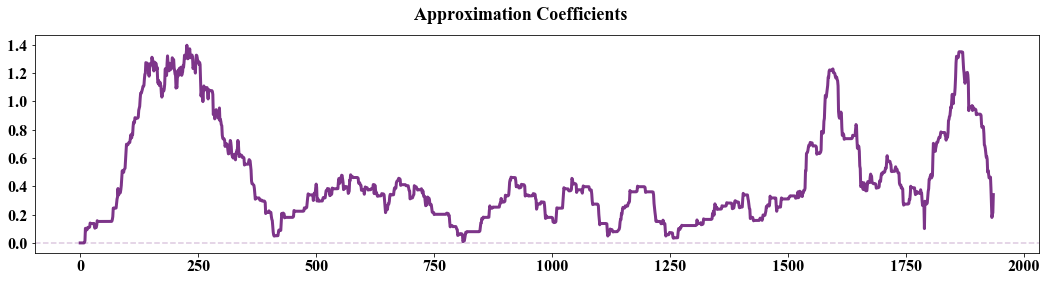

In [46]:
plt.figure(figsize=(18,4)) 
gs = plt.GridSpec(1, 1)
ax = plt.subplot(gs[0])
ax.plot(b2b_approx, color='#762a83', alpha=0.95,linewidth=3)
ax.axhline(y=0, color='#762a83', linestyle='--', alpha=0.25)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.suptitle("Approximation Coefficients", fontsize=18, fontweight='bold')
plt.savefig('gapdh_B2B10GROseq_approx.png', transparent=True)

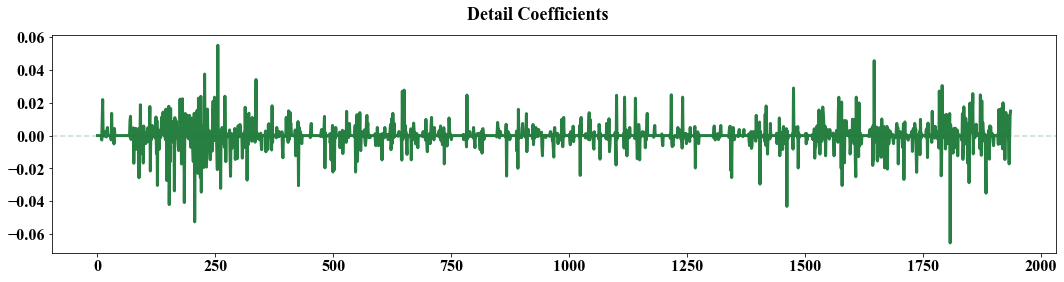

In [47]:
plt.figure(figsize=(18,4)) 
gs = plt.GridSpec(1, 1)
ax = plt.subplot(gs[0])
ax.plot(b2b_detail, color='#1b7837', alpha=0.95,linewidth=3)
ax.axhline(y=0, color='#1b7837', linestyle='--', alpha=0.25) 
plt.xticks(fontsize = 16)#,rotation=45)
plt.yticks(fontsize = 16)

plt.suptitle("Detail Coefficients", fontsize=18, fontweight='bold')
plt.savefig('gapdh_B2B10GROseq_detail.png', transparent=True)

## FTL

In [57]:
sample_bedGraph2 = '/Users/rutendosigauke/Desktop/Dowell_Lab/projects/wavelets/data/B2BGROseq/B2B30GROseq-TE.bedGraph'

sample_coverage2 = bedgraph_awk_strand(sample_bedGraph2, 
                                      "chr19", 48965309, 48966879, "./", 
                                      "temp_cov", positive=True)

In [58]:
expand_starting_list2, expand_coverage_list2 = expand_bedgraph(sample_coverage2,
                                                            48965309, 48966879)
    

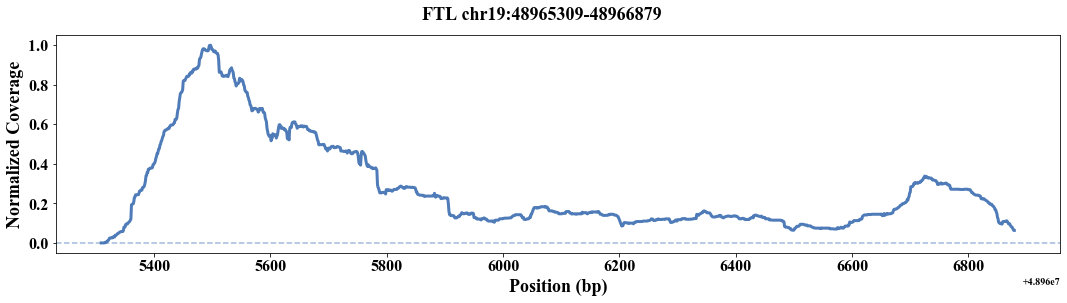

In [59]:
plt.figure(figsize=(18,4)) # #d73027
gs = plt.GridSpec(1, 1)
ax2 = plt.subplot(gs[0])
ax2.plot(expand_starting_list2, expand_coverage_list2, color='#4575b4', alpha=0.95,linewidth=3)
ax2.axhline(y=0, color='#4575b4', linestyle='--', alpha=0.5)
ax2.set_xlabel('Position (bp)',fontsize=18,fontweight='bold')
ax2.set_ylabel('Normalized Coverage',fontsize=18,fontweight='bold') 
plt.xticks(fontsize = 16)#,rotation=45)
plt.yticks(fontsize = 16)

plt.suptitle("FTL chr19:48965309-48966879", fontsize=18, fontweight='bold')
plt.savefig('./figures/ftl_B2B10GROseq_coverage.png', transparent=True)

In [60]:
b2b_approx_ftl, b2b_detail_ftl = dwt_coefficients(sample_coverage2,
                                          48965309, 48966879, 
                                          dwtwavelet='sym5')

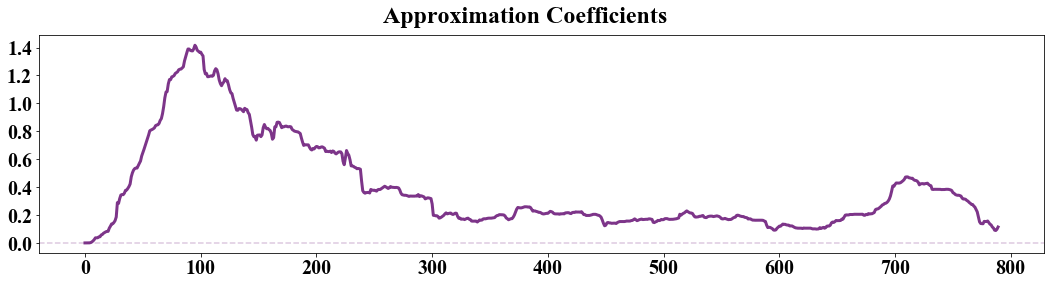

In [65]:
plt.figure(figsize=(18,4)) 
gs = plt.GridSpec(1, 1)
ax = plt.subplot(gs[0])
ax.plot(b2b_approx_ftl, color='#762a83', alpha=0.95,linewidth=3)
ax.axhline(y=0, color='#762a83', linestyle='--', alpha=0.25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)

plt.suptitle("Approximation Coefficients", fontsize=24, fontweight='bold')
plt.savefig('./figures/ftl_B2B10GROseq_approx.png', transparent=True)

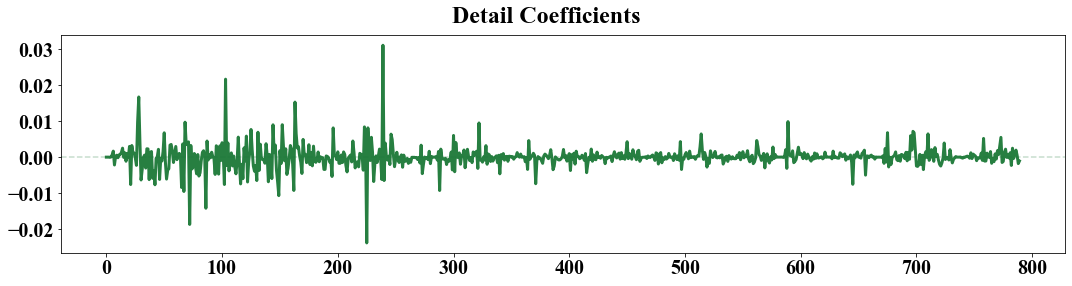

In [64]:
plt.figure(figsize=(18,4)) 
gs = plt.GridSpec(1, 1)
ax = plt.subplot(gs[0])
ax.plot(b2b_detail_ftl, color='#1b7837', alpha=0.95,linewidth=3)
ax.axhline(y=0, color='#1b7837', linestyle='--', alpha=0.25) 
plt.xticks(fontsize = 20)#,rotation=45)
plt.yticks(fontsize = 20)

plt.suptitle("Detail Coefficients", fontsize=24, fontweight='bold')
plt.savefig('./figures/ftl_B2B10GROseq_detail.png', transparent=True)